**A data science experiment using data from the KDD 2010 Educational Data Mining Challenge**

The aim of this IPython Notebook is to give you a sense of the dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

In [16]:
# Get the data:
train_filepath = 'data/train.csv'
test_filepath = 'data/test.csv'
traindata = pd.read_table(train_filepath)
testdata = pd.read_table(test_filepath)

/Users/zhangge/Documents/DB_proj/project-retepognajd/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
/Users/zhangge/Documents/DB_proj/project-retepognajd/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [18]:
testdata.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,10039,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP01,1,2/300*X = 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10482,52vEY7f17k,"Unit CTA1_06, Section CTA1_06-3",FOR05,1,xScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,28
2,11024,52vEY7f17k,"Unit ES_03, Section ES_03-6",EG52,1,2.9 = -2x+3.7+x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SkillRule: Consolidate vars, no coeff; CLT]",27
3,11476,52vEY7f17k,"Unit CTA1_08, Section CTA1_08-3",REAL10,1,yScale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changing axis intervals,65
4,11948,52vEY7f17k,"Unit ES_04, Section ES_04-12",EG58,7,xR2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Inspect some of the training data
traindata.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,9938,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C1,2005-09-09 12:23:34.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,2005-09-09 12:24:07.0,33.0,33.0,NaN,1,0,0,1,NaN,NaN
1,9939,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R1C2,2005-09-09 12:24:07.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,2005-09-09 12:24:22.0,15.0,15.0,NaN,1,0,0,1,NaN,NaN
2,9940,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C1,2005-09-09 12:24:22.0,2005-09-09 12:25:16.0,2005-09-09 12:25:40.0,2005-09-09 12:25:40.0,78.0,NaN,78.0,0,2,0,1,Define Variable,1
3,9941,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R3C2,2005-09-09 12:25:40.0,2005-09-09 12:25:51.0,2005-09-09 12:27:24.0,2005-09-09 12:27:24.0,104.0,NaN,104.0,0,4,9,1,"Using small numbers~~Write expression, positiv...",1~~1~~1
4,9942,52vEY7f17k,"Unit CTA1_13, Section CTA1_13-1",PROP04,1,R4C1,2005-09-09 12:27:24.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,2005-09-09 12:27:30.0,6.0,6.0,NaN,1,0,0,1,Entering a given,1


In [5]:
traindata['Step Name']

0                    R1C1
1                    R1C2
2                    R3C1
3                    R3C2
4                    R4C1
5                    R5C1
6                    R6C1
7                    R7C2
8          ValidEquations
9           7/10*X = 1400
10           7X/10 = 1400
11                   R7C1
12                   R1C1
13                   R1C2
14                   R3C1
15                   R3C2
16                   R4C2
17                   R4C1
18                   R5C1
19                   R6C1
20                   R7C2
21         ValidEquations
22        3/5*X = 1200000
23         3X/5 = 1200000
24                   R7C1
25                   R1C1
26                   R1C2
27                   R3C1
28                   R3C2
29                   R4C1
               ...       
232714               R2C1
232715               R4C1
232716               R5C1
232717               R1C2
232718               R2C2
232719               R3C2
232720               R6C2
232721      

Let's begin asking some basic questions of the data

### How many students are interacting with the system?

In [6]:
# Take the column of anonimized student IDs and count the number of unique entries
print('Number of students: ', len(np.unique(traindata['Anon Student Id'])))

Number of students:  174


### How long does it take a student to solve any problem step on average?

In [7]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    181599.000000
mean         17.924024
std          35.179534
min           0.000000
25%           5.000000
50%           8.000000
75%          17.000000
max        1067.000000
Name: Correct Step Duration (sec), dtype: float64

So ignoring all the students that did not solve a problem step correctly, the average duraction for any problem step was about 18 seconds.

Let's histogram this data to see the distribution.

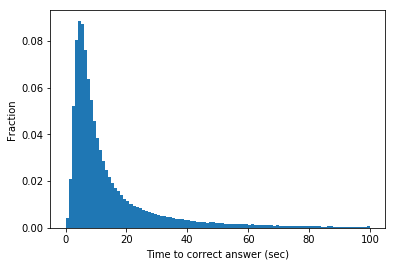

In [8]:
%matplotlib inline
hist = plt.hist(np.array(csd.dropna()),bins=100,density=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

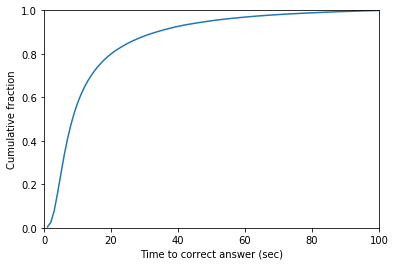

In [9]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,100,0,1.0))
plt.show()

The histogram shows visually what mere statistics hints at. The distribution of students is heavily weighted towards those who are solving problems in under 20 seconds. The cumulative distribution function (CDF) shows that roughly 80% of successful students solve the problem within 20 seconds. After 40 seconds, 90% of successful students have finished the problem. Almost no students take longer than 80 seconds.

### Completion time by problem

OK, let's ask a slightly harder question: how are students doing problem by problem? The answer will take several parts.

First, let's get the number of unique problems

In [1]:
# The unique identifier for each problem is the 'Problem Name'
problems = traindata['Problem Name']

NameError: name 'traindata' is not defined

In [11]:
# Get just the uniques
problems = np.unique(problems)
print('Number of unique problems: ', len(problems))

Number of unique problems:  1021


Then, let's compute which problems need the largest time on average.

In [12]:
pmedian_times = {}
for p in problems:
    pmedian_times[p] = traindata[traindata['Problem Name'] == p]['Correct Step Duration (sec)'].median()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
import operator

In [14]:
sorted_times = sorted(pmedian_times.items(), key=operator.itemgetter(1), reverse=True)

In [15]:
print("The hardest top-5 problem and its average correct duration (sec).")
print(sorted_times[:5])

print("The earliest top-5 problem and its average correct duration (sec).")
print(sorted_times[len(sorted_times)-5:])

The hardest top-5 problem and its average correct duration (sec).
[('JAN13C', 65.0), ('TRANSFORMN022', 32.0), ('EG-FACTOR45', 30.0), ('BH1T33B', 25.0), ('EG-FACTOR47', 23.0)]
The earliest top-5 problem and its average correct duration (sec).
[('TRANSFORMN013', 1.25), ('TRANSFORMN014', 1.25), ('TRANSFORMG042', 1.0), ('TRANSFORMN004', 1.0), ('TRANSFORMN005', 1.0)]


Statistical results of problem difficulty

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


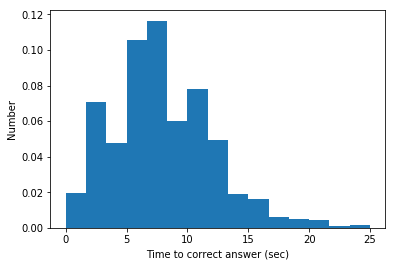

In [16]:
hist = plt.hist(np.array(list(pmedian_times.values())),bins=15,density=True,log=False,range=(0,25))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Number')
plt.show()

If we take the time to correct answer as the difficulty of a problem, the histogram shows visually the difficulties of all the problems. 

### Conclusion
There are many other interesting characteristic in this dataset.
Like, 
* After some practices, students may become better at solving problems.
* Same problem step for different students may request different knowledge components. Or for some problems, there is only one correct knowledge components

These may be some things you need to take consider into for the feature engineering part. We leave them for you to explore deeper.